In [29]:
import sys
sys.path.append('../..')
import pandas as pd
import numpy as np
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)

conversion_mA_to_raw = 1 / 2.69
conversion_pwm_to_raw = 1 / 0.113

## Sinus short reference
file_path1 = "../../data/exp12_01/exp12_01_M1_sinus_short_20ms.txt"
file_path2 = "../../data/exp12_01/exp12_01_M2_sinus_short_20ms.txt"
file_path3 = "../../data/exp12_01/exp12_01_M3_sinus_short_20ms.txt"
file_path4 = "../../data/exp12_01/exp12_01_M4_sinus_short_20ms.txt"

df1 = process_file(file_path1)
df2 = process_file(file_path2)
df3 = process_file(file_path3)
df4 = process_file(file_path4)

print(df1)

df1 = df1.loc[df1.index.repeat(4)].reset_index(drop=True)
df2 = df2.loc[df2.index.repeat(4)].reset_index(drop=True)
df3 = df3.loc[df3.index.repeat(4)].reset_index(drop=True)
df4 = df4.loc[df4.index.repeat(4)].reset_index(drop=True)

# Constants
time_step = 0.02  # Time step in seconds
period = 5        # Period of the sinus wave in seconds
total_time = 20.24   # Total time for the simulation in seconds

# Time array from 0 to total_time with a step of time_step
time = np.arange(0, total_time, time_step)

# Creating a DataFrame for the references
df_current = pd.DataFrame({
    'time': time,
    'q1_l': (df1["DXL_Current"]) * conversion_mA_to_raw,
    'q1_r': (df2["DXL_Current"]) * conversion_mA_to_raw,
    'q2_l': (df3["DXL_Current"]) * conversion_mA_to_raw,
    'q2_r': (df4["DXL_Current"]) * conversion_mA_to_raw
})

df_voltage = pd.DataFrame({
    'time': time,
    'q1_l': (df1["DXL_PWM"]) * conversion_pwm_to_raw,
    'q1_r': (df2["DXL_Current"]) * conversion_pwm_to_raw,
    'q2_l': (df3["DXL_Current"]) * conversion_pwm_to_raw,
    'q2_r': (df4["DXL_Current"]) * conversion_pwm_to_raw
})

# Save to CSV file
# csv_filename1 = 'current_ref_sinus_short.csv'
# csv_filename2 = 'pwm_ref_sinus_short.csv'
# df_current.to_csv(csv_filename1, index=False)
# df_voltage.to_csv(csv_filename2, index=False)

       t  DXL_PWM  DXL_Current  DXL_Velocity  DXL_Position  DXL_Input_Voltage  \
0      0  0.00791      0.00000      0.000000      1.571215               11.9   
1      1  0.31753      0.10491      0.000000      1.577359               11.9   
2      2  0.42827      0.11567      0.503597      1.623435               11.8   
3      3  0.39663      0.05111      0.839329      1.694086               11.8   
4      4  0.41245      0.10222      0.743406      1.755522               11.9   
..   ...      ...          ...           ...           ...                ...   
245  245  0.29380      0.00269      0.599521      1.194922               11.9   
246  246  0.31753      0.00269      0.671463      1.250214               11.9   
247  247  0.34126      0.01614      0.719425      1.308578               11.9   
248  248  0.34917      0.02152      0.743406      1.371550               11.9   
249  249  0.36499      0.03497      0.743406      1.434521               11.9   

            U  
0    0.0941

In [33]:
# Constant input reference (slow one) /!\ to be applied ONLY on Msolo !!
I = 50  * conversion_mA_to_raw # [mA] -> [raw]
U = 50 * conversion_pwm_to_raw  # [%] -> [raw]

# Constants
time_step = 0.02  # Time step in seconds
period = 5        # Period of the sinus wave in seconds
total_time = 600   # Total time for the simulation in seconds

# Time array from 0 to total_time with a step of time_step
time = np.arange(0, total_time, time_step)

data = {'Column1': range(len(time))}
df = pd.DataFrame(data)
# df_repeated = df.loc[df.index.repeat(4)].reset_index(drop=True)
df['Column1'] = I
df['Column2'] = 0
df_constant_I = pd.DataFrame({
    'time': time,
    'q1_l': df['Column1'],
    'q1_r': df['Column2'],
    'q2_l': df['Column2'],
    'q2_r': df['Column2']
})

df['Column1'] = U
df_constant_U = pd.DataFrame({
    'time': time,
    'q1_l': df['Column1'],
    'q1_r': df['Column2'],
    'q2_l': df['Column2'],
    'q2_r': df['Column2']
})

# Save to CSV file
csv_filename1 = 'current_ref_constant_ONLY_Msolo.csv'
csv_filename2 = 'pwm_ref_constant_ONLY_Msolo.csv'
df_constant_I.to_csv(csv_filename1, index=False)
df_constant_U.to_csv(csv_filename2, index=False)

In [31]:
# Experiments to do on Dxl pwm
print(5 * conversion_pwm_to_raw)
print(10 * conversion_pwm_to_raw)
20 * conversion_pwm_to_raw # OK
print(30 * conversion_pwm_to_raw)
print(40 * conversion_pwm_to_raw)
50 * conversion_pwm_to_raw # OK
60 * conversion_pwm_to_raw
70 * conversion_pwm_to_raw
75 * conversion_pwm_to_raw # OK
80 * conversion_pwm_to_raw
90 * conversion_pwm_to_raw
100 * conversion_pwm_to_raw

-10 * conversion_pwm_to_raw
-20 * conversion_pwm_to_raw # OK
-30 * conversion_pwm_to_raw
-40 * conversion_pwm_to_raw
-50 * conversion_pwm_to_raw # OK
-60 * conversion_pwm_to_raw
-70 * conversion_pwm_to_raw # OK
-75 * conversion_pwm_to_raw
-80 * conversion_pwm_to_raw
-90 * conversion_pwm_to_raw
-100 * conversion_pwm_to_raw

# Dans un premier temps, juste faire les OK, pour vérifier si c'est OK la théorie. Puis cloturer avec un max d'expériences.

44.24778761061947
88.49557522123894
265.4867256637168
353.98230088495575


-884.9557522123894

In [32]:
# Experiments to do on Dxl current
conversion_current_to_raw = 2.69
10 * conversion_current_to_raw
20 * conversion_current_to_raw
30 * conversion_current_to_raw
40 * conversion_current_to_raw
50 * conversion_current_to_raw
60 * conversion_pwm_to_raw
70 * conversion_pwm_to_raw
75 * conversion_pwm_to_raw
80 * conversion_pwm_to_raw
90 * conversion_pwm_to_raw
100 * conversion_pwm_to_raw

-10 * conversion_pwm_to_raw
-20 * conversion_pwm_to_raw
-30 * conversion_pwm_to_raw
-40 * conversion_pwm_to_raw
-50 * conversion_pwm_to_raw
-60 * conversion_pwm_to_raw
-70 * conversion_pwm_to_raw
-75 * conversion_pwm_to_raw
-80 * conversion_pwm_to_raw
-90 * conversion_pwm_to_raw
-100 * conversion_current_to_raw

-269.0

In [8]:
import numpy as np
import pandas as pd

# Constants
time_step = 0.02  # Time step in seconds

ramp_up_time = 12  # Time to ramp up to the target value
high_time = 3   # Time to stay at the high value
ramp_down_time = 0  # Time to ramp down from the target value
zero_time = 10  # Time at zero
cycle_time = ramp_up_time + high_time + ramp_down_time + zero_time

values = [5, 10, 15, 20, 25, 30, 35]  # Example values for I1 to I5 (raw, need to multiply by 2.69 to get it in mA)
values = [10, 15, 20, 25, 30, 35, 40]
values = [val for pair in zip(values, [-val for val in values]) for val in pair]

# Time array from 0 to total_time with a step of time_step
total_time = cycle_time * len(values)
time = np.arange(0, total_time, time_step)

# Generate pattern with smooth transitions
def generate_smooth_pattern(ramp_up_time, high_time, ramp_down_time, zero_time, val, time_step):
    ramp_up = np.linspace(0, val, int(ramp_up_time/time_step))
    high = np.full(int(high_time/time_step), val)
    ramp_down = np.linspace(val, 0, int(ramp_down_time/time_step))
    zero = np.zeros(int(zero_time/time_step))
    return np.concatenate([ramp_up, high, ramp_down, zero])

pattern = np.concatenate([generate_smooth_pattern(ramp_up_time, high_time, ramp_down_time, zero_time, val, time_step) for val in values])

# Initialize array for I values
I_values = np.zeros_like(time)

# Assign the pattern to I_values
I_values[:len(pattern)] = pattern


# Create DataFrame
df_constant = pd.DataFrame({
    'time': time,
    'q1_l': I_values,
    'q1_r': I_values,  
    'q2_l': I_values,
    'q2_r': I_values,
})

# Save to CSV file
csv_filename = 'constant_input_ref.csv'
df_constant.to_csv(csv_filename, index=False)

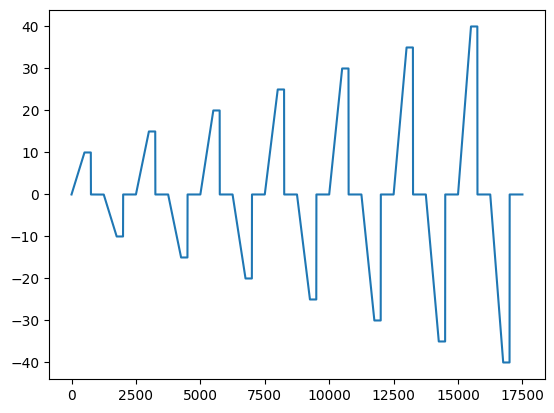

In [5]:
import matplotlib.pyplot as plt

plt.plot(I_values)

In [33]:
import numpy as np
import pandas as pd

# Constants
time_step = 0.02  # Time step in seconds

ramp_up_time = 0  # Time to ramp up to the target value
high_time = 60   # Time to stay at the high value
ramp_down_time = 0  # Time to ramp down from the target value
zero_time = 10  # Time at zero
cycle_time = ramp_up_time + high_time + ramp_down_time + zero_time

values = [8, 15, 20, 40, 80, 160, 320, 640]  # Example values for I1 to I5 (raw, need to multiply by 2.69 to get it in mA)

values = [val for pair in zip(values, [-val for val in values]) for val in pair]

# Time array from 0 to total_time with a step of time_step
total_time = cycle_time * len(values)
time = np.arange(0, total_time, time_step)

# Generate pattern with smooth transitions
def generate_smooth_pattern(ramp_up_time, high_time, ramp_down_time, zero_time, val, time_step):
    ramp_up = np.linspace(0, val, int(ramp_up_time/time_step))
    high = np.full(int(high_time/time_step), val)
    ramp_down = np.linspace(val, 0, int(ramp_down_time/time_step))
    zero = np.zeros(int(zero_time/time_step))
    return np.concatenate([ramp_up, high, ramp_down, zero])

pattern = np.concatenate([generate_smooth_pattern(ramp_up_time, high_time, ramp_down_time, zero_time, val, time_step) for val in values])

# Initialize array for I values
I_values = np.zeros_like(time)

# Assign the pattern to I_values
I_values[:len(pattern)] = pattern


# Create DataFrame
df_constant = pd.DataFrame({
    'time': time,
    'q1_l': I_values,
    'q1_r': I_values,  # Assuming you want to keep these as 0
    'q2_l': I_values,  # Assuming you want to keep these as 0
    'q2_r': I_values,  # Assuming you want to keep these as 0
})

# Save to CSV file
csv_filename = 'constant_input_ref_pwm.csv'
df_constant.to_csv(csv_filename, index=False)

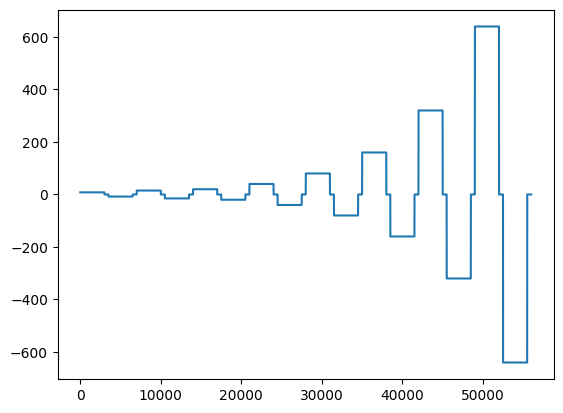

In [34]:
import matplotlib.pyplot as plt

plt.plot(I_values)

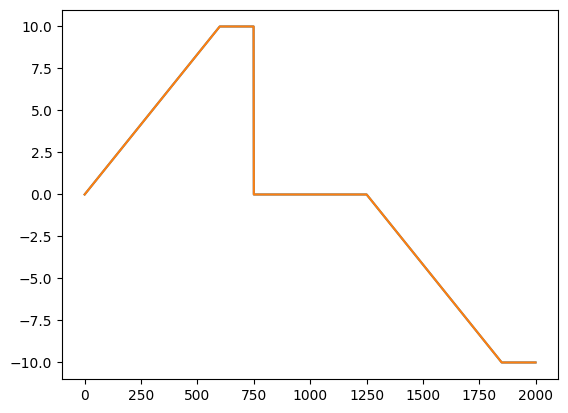

In [9]:
import matplotlib.pyplot as plt

file = "constant_input_ref22.csv"
df22 = pd.read_csv(file)
plt.plot(df22.q1_l[:2000])
plt.plot(I_values[:2000])

In [28]:
import numpy as np
import pandas as pd

# Constants for the existing setup
time_step = 0.02  # Time step in seconds
total_time = 120  # Adjusted to demonstrate sinusoid variation, modify as needed
time = np.arange(0, total_time, time_step)

# New constants for sinusoidal trajectory
initial_amplitude = 200  # Initial amplitude of the sinusoid
amplitude_growth_rate = 0  # How much the amplitude increases each second
initial_frequency = 1  # Initial frequency in Hz
frequency_growth_rate = 0.000  # How much the frequency increases each second

# Function to generate a sinusoidal trajectory with increasing amplitude and frequency
def generate_sinusoid(time, initial_amplitude, amplitude_growth_rate, initial_frequency, frequency_growth_rate):
    amplitude = initial_amplitude + amplitude_growth_rate * time
    frequency = initial_frequency + frequency_growth_rate * time
    return amplitude * np.sin(2 * np.pi * frequency * time)

# Generating the sinusoidal trajectory
sinusoid_trajectory = generate_sinusoid(time, initial_amplitude, amplitude_growth_rate, initial_frequency, frequency_growth_rate)

# Create DataFrame
df_sinusoidal = pd.DataFrame({
    'time': time,
    'q1_l': sinusoid_trajectory,
    'q1_r': sinusoid_trajectory,  # Update as needed
    'q2_l': sinusoid_trajectory,  # Update as needed
    'q2_r': sinusoid_trajectory,  # Update as needed
})

# Save to CSV file
csv_filename_sinusoidal = 'sinusoidal_input_ref_pwm.csv'
df_sinusoidal.to_csv(csv_filename_sinusoidal, index=False)

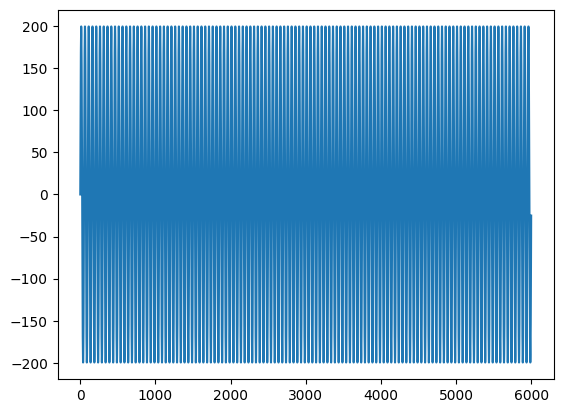

In [29]:
import matplotlib.pyplot as plt

plt.plot(sinusoid_trajectory)

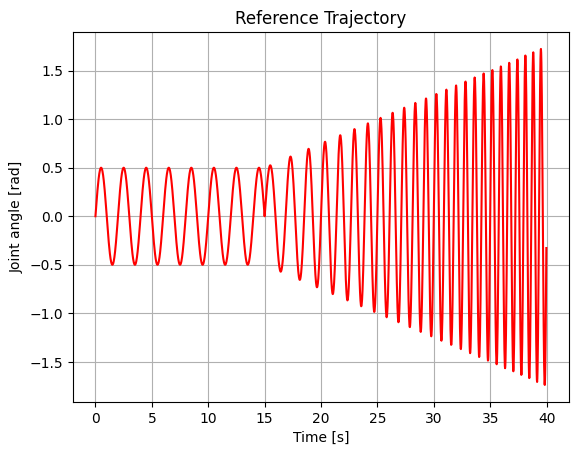

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
time_step = 0.02  # Time step in seconds

# Define durations for each part
first_part_duration = 15  # Duration of the first part with constant sinusoidal oscillations
second_part_duration = 25  # Duration of the second part with increasing frequency and amplitude

# Define initial parameters for the second part
initial_amplitude_second_part = 0.5  # Initial amplitude of the sinusoid in the second part
amplitude_growth_rate = 0.05  # How much the amplitude increases each second in the second part
initial_frequency_second_part = 1 / 5  # Initial frequency in Hz in the second part
frequency_growth_rate = 0.02  # How much the frequency increases each second in the second part

# Time arrays for each part
time_first_part = np.arange(0, first_part_duration, time_step)
time_second_part = np.arange(first_part_duration, first_part_duration + second_part_duration, time_step)

# Generate first part with constant sinusoidal oscillations
amplitude_first_part = 0.5  # Amplitude of the sinusoid in the first part
frequency_first_part = 1 / 2  # Frequency in Hz in the first part
sinusoid_first_part = amplitude_first_part * np.sin(2 * np.pi * frequency_first_part * time_first_part)

# Function to generate the second part with increasing frequency and amplitude
def generate_increasing_sinusoid(time, initial_amplitude, amplitude_growth_rate, initial_frequency, frequency_growth_rate):
    amplitude = initial_amplitude + amplitude_growth_rate * (time - first_part_duration)
    frequency = initial_frequency + frequency_growth_rate * (time - first_part_duration)
    return amplitude * np.sin(2 * np.pi * frequency * time)

# Generating the second part
sinusoid_second_part = generate_increasing_sinusoid(time_second_part, initial_amplitude_second_part, amplitude_growth_rate, initial_frequency_second_part, frequency_growth_rate)

# Concatenate both parts
time_total = np.concatenate([time_first_part, time_second_part])
sinusoid_trajectory = np.concatenate([sinusoid_first_part, sinusoid_second_part])

# Plotting the trajectory
plt.plot(time_total, sinusoid_trajectory, color='red')
plt.xlabel('Time [s]')
plt.ylabel('Joint angle [rad]')
plt.title('Reference Trajectory')
plt.grid(True)
plt.show()

# Create DataFrame
df_trajectory = pd.DataFrame({
    'time': time_total,
    'trajectory': sinusoid_trajectory
})

# Save to CSV file
csv_filename = 'trajectory.csv'
df_trajectory.to_csv(csv_filename, index=False)
